In [6]:
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
import statsmodels.api as sm
from matplotlib import pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from itertools import chain, combinations
from imageio import imread

# Exercise 5.23

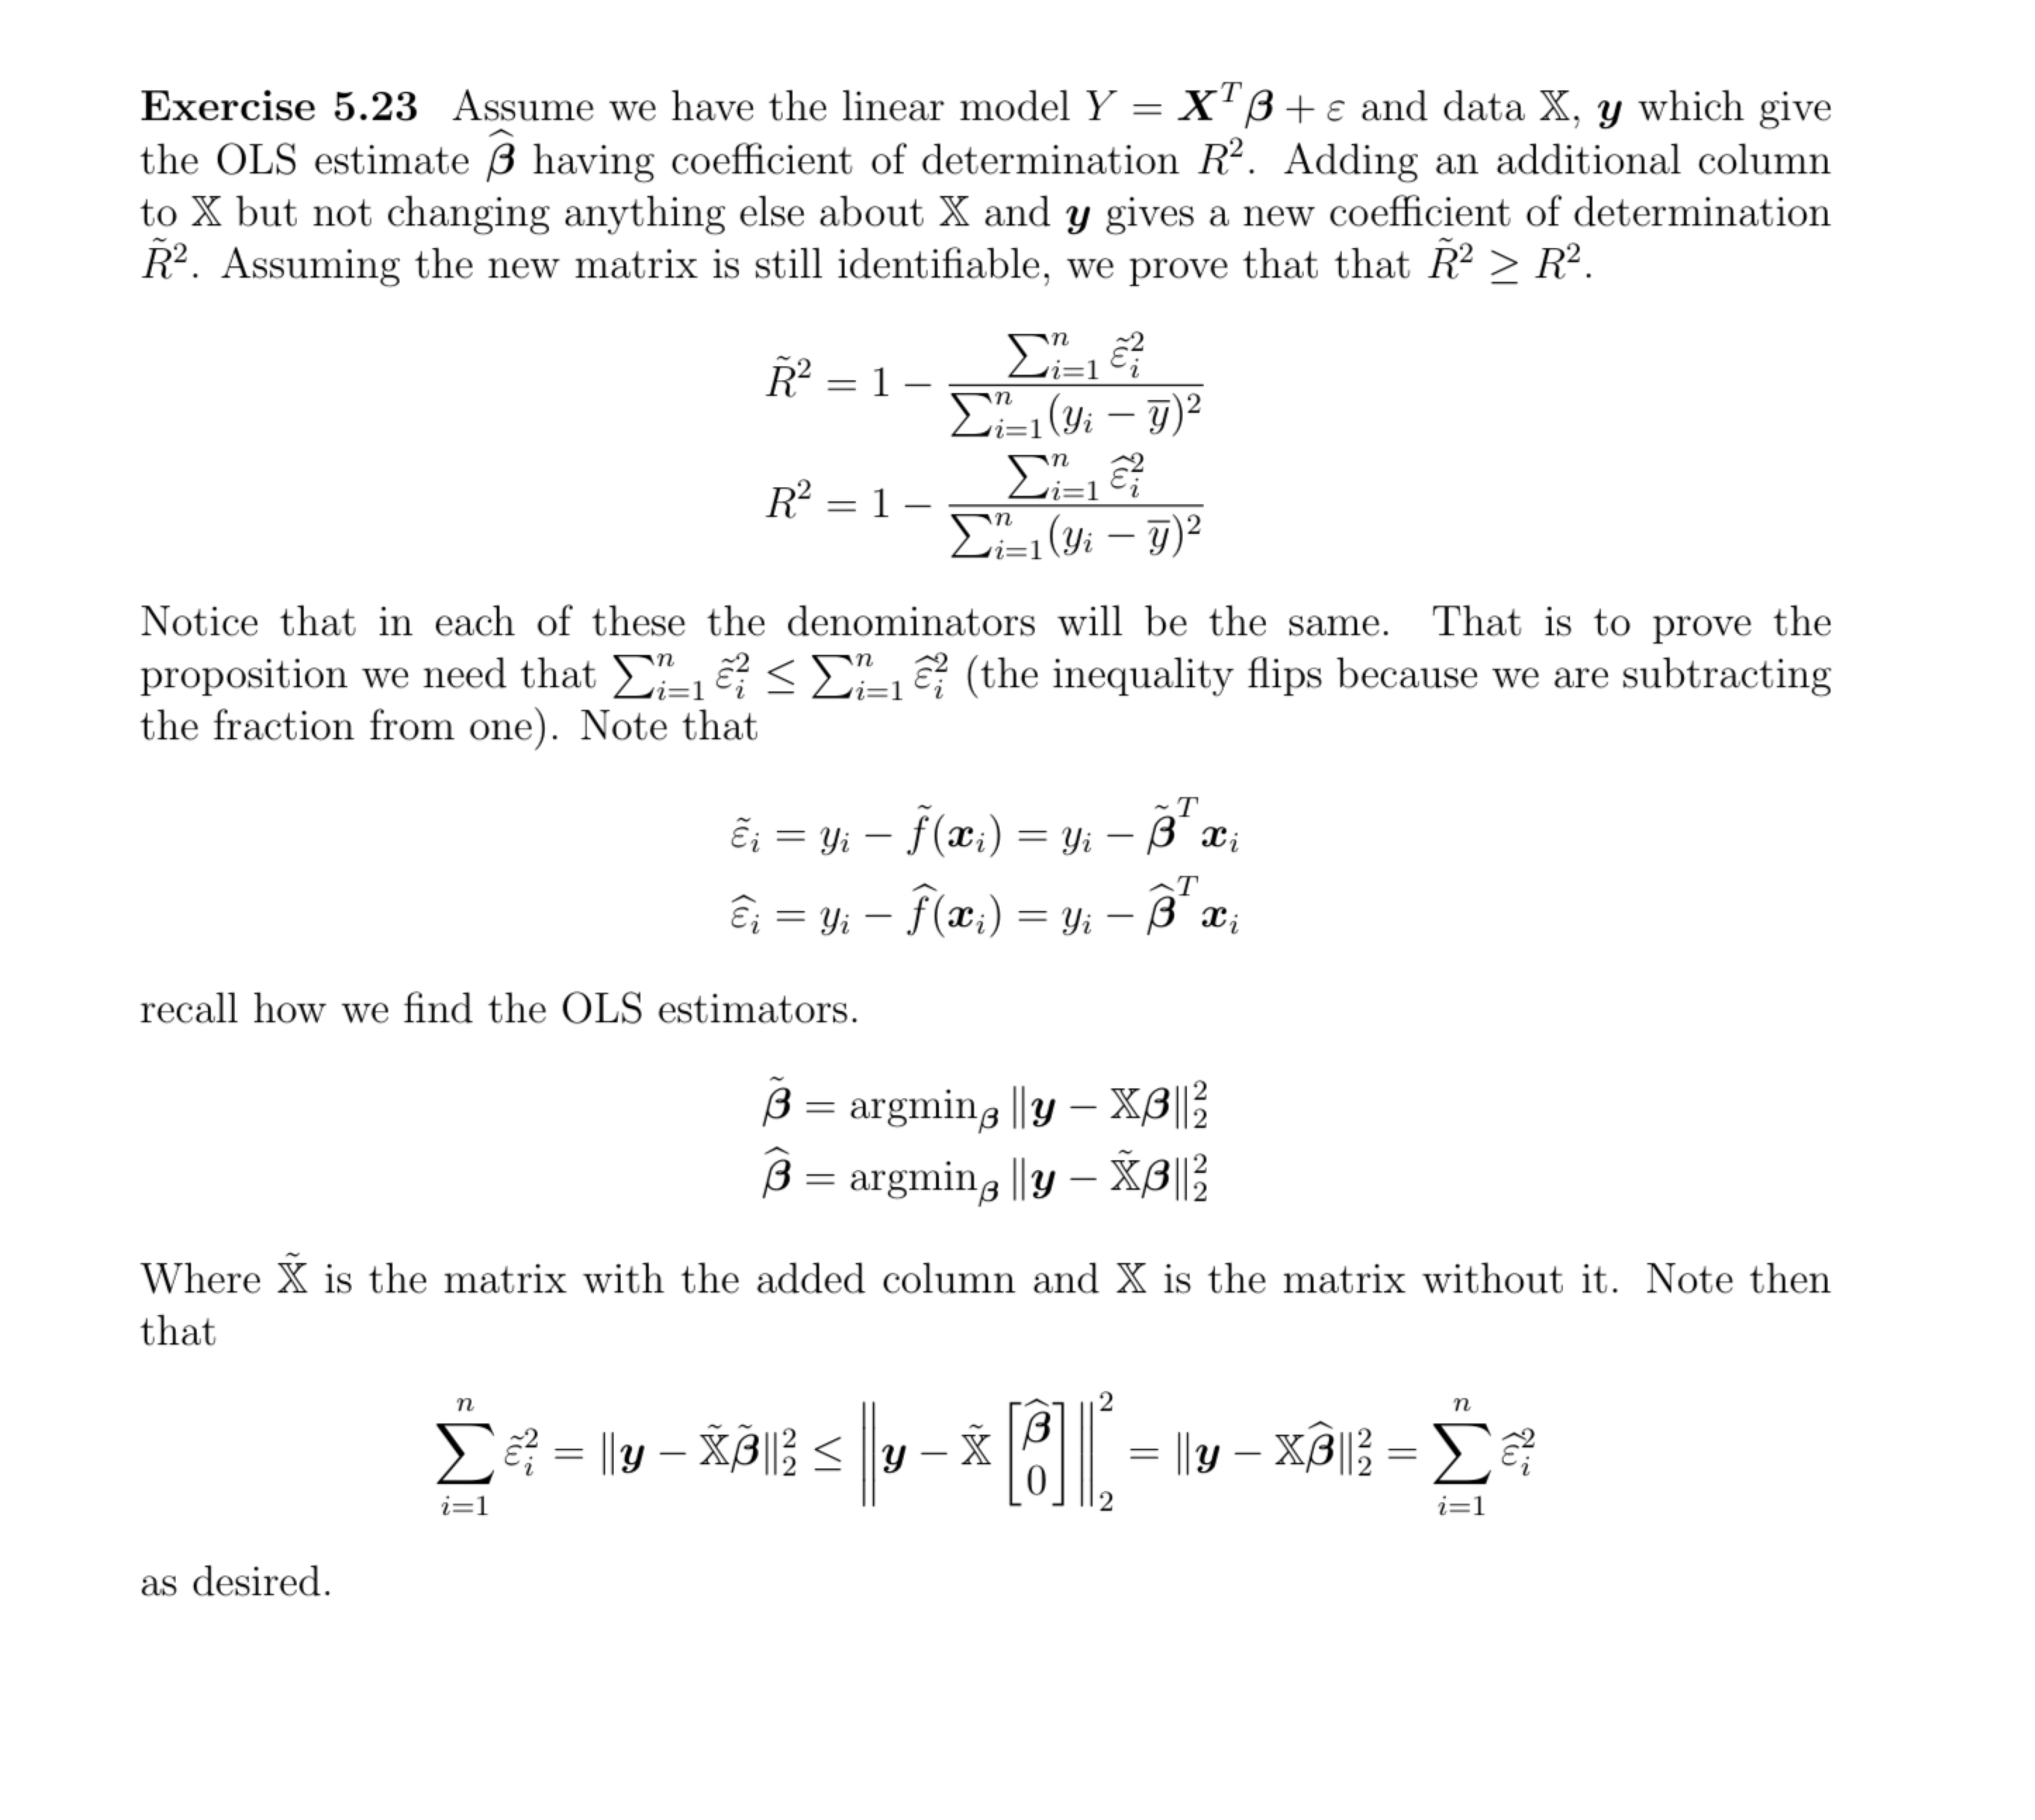

In [14]:
prob_23 = imread("5_23.png")
fig = plt.figure(figsize=(15,8))
fig.set_dpi(400)
ax = fig.add_subplot()
ax.imshow(prob_23)
ax.axis('off')
plt.show()

# Exercise 5.24 part(1)

In [ ]:
def prob5_24_1():
    df = pd.read_csv('wages.csv')
    y = df['wage']
    df['x0'] = 1
    X = df[['educ', 'exper', 'tenure', 'married', 'female', 'x0']]
    results = sm.OLS(y, X).fit()
    print(results.summary())

prob5_24_1()

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.368
Model:                            OLS   Adj. R-squared:                  0.362
Method:                 Least Squares   F-statistic:                     60.61
Date:                Mon, 08 Nov 2021   Prob (F-statistic):           1.02e-49
Time:                        04:14:39   Log-Likelihood:                -1312.3
No. Observations:                 526   AIC:                             2637.
Df Residuals:                     520   BIC:                             2662.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
educ           0.5557      0.050     11.144      0.0

the coefficient on female got less negative. This is because the other features we added are related to the gender of the person. $R^2$ is larger, but we know that $R^2$ will always be larger for datasets with more features so this doesn't mean this is a bad model. The pvalues are all small meaning that these were good features to choose to model wage. 

# Exercise 5.24 part(ii)

In [ ]:
def prob5_24_2():
    df = pd.read_csv('wages.csv')
    y = df['wage']
    df['x0'] = 1
    df['married*female'] = df['married']*df['female']
    X = df[['educ', 'exper', 'tenure', 'married', 'female', 'x0', 'married*female']]
    results = sm.OLS(y, X).fit()
    print(results.summary())

prob5_24_2()

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.392
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     55.84
Date:                Mon, 08 Nov 2021   Prob (F-statistic):           3.90e-53
Time:                        04:17:37   Log-Likelihood:                -1302.1
No. Observations:                 526   AIC:                             2618.
Df Residuals:                     519   BIC:                             2648.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
educ               0.5529      0.049     11.

The coefficient on female is still negative but much closer to 0 than it was before we added "married\*female". The coefficient on "married\*female" is $-2.3953$ making "married\*female" negatively correlated to wage. Meaning that there is a correlation between being married and female to getting a lower wage. The $p$-value of the female coefficient is now higher meaning that the "female" feature is now less important because the "female\*married" has many of the "female" cases entrenched in it. 

# Exercise 5.25

In [ ]:
def prob5_25():
    df = pd.read_csv('wages.csv')
    y = df['wage']
    df['x0'] = 1
    df['married*female'] = df['married']*df['female']
    X = df[['educ','tenure','married','married*female', 'x0']]
    results = sm.OLS(y, X).fit()
    print(results.summary())
prob5_25()


                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.389
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     82.83
Date:                Mon, 08 Nov 2021   Prob (F-statistic):           2.10e-54
Time:                        04:33:28   Log-Likelihood:                -1303.6
No. Observations:                 526   AIC:                             2617.
Df Residuals:                     521   BIC:                             2639.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
educ               0.5276      0.046     11.

The $R$-squared value drops slightly but not a ton because we are deleting the features with the highest $p$-values whose confidence intervals contain $0$. 

# Exercise 5.26

In [ ]:
def prob5_26():
    df = pd.read_csv('wages.csv')
    y = df['wage']
    df['x0'] = 1
    df['married*female'] = df['married']*df['female']
    X = df[['female','educ','exper','tenure','married','married*female','numdep','nonwhite', 'x0']]
    results = sm.OLS(y, X).fit()
    #result of first model
    print(results.summary())
    features = ['female','educ','exper','tenure','married','married*female','numdep','nonwhite']
    powerset = list(chain.from_iterable(combinations(features, r) for r in range(1,len(features)+1)))

    #get min_aic and best features
    min_aic = np.inf
    best_features = None
    for comb in powerset:
        current_feature = list(comb)
        current_feature.append('x0')
        X = df[current_feature]
        results = sm.OLS(y, X).fit()
        curr_aic = results.aic
        if curr_aic < min_aic:
            min_aic = curr_aic
            best_features = current_feature 

    return min_aic, best_features

prob5_26()


                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.393
Model:                            OLS   Adj. R-squared:                  0.384
Method:                 Least Squares   F-statistic:                     41.90
Date:                Mon, 08 Nov 2021   Prob (F-statistic):           1.42e-51
Time:                        04:49:08   Log-Likelihood:                -1301.6
No. Observations:                 526   AIC:                             2621.
Df Residuals:                     517   BIC:                             2660.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
female            -0.3441      0.414     -0.

(2616.7023485208088,
 ['educ', 'exper', 'tenure', 'married', 'married*female', 'x0'])

Best Score: 2616.7023485208088

Best Features: ['educ', 'exper', 'tenure', 'married', 'married*female', 'x0']

# Exercise 5.27

In [ ]:
def prob5_27():
    df = pd.read_csv('wages.csv')
    y = df['wage']
    df['married*female'] = df['married']*df['female']
    X = df[['female','educ','exper','tenure','married','married*female','numdep','nonwhite']]

    regr = LinearRegression()
    regr.fit(X, y)
    coefficients = regr.coef_
    print(coefficients)

prob5_27()

[-0.34413527  0.56308905  0.02091295  0.12976128  1.73557801 -2.3578156
  0.08909389 -0.2142343 ]


The coefficients are the same!

# Exercise 5.28

In [ ]:
def prob5_28():
    #read in csv into dataframe
    df = pd.read_csv('wages.csv')
    y = df['wage']
    df['married*female'] = df['married']*df['female']
    #train on the full 
    X_full = df.copy()
    X_full_train, X_full_test,  y_full_train, y_full_test = train_test_split(X_full, y, train_size = 0.7)
    regr_full = LinearRegression()
    regr_full.fit(X_full_train, y_full_train)
    full_score = regr_full.score(X_full_test, y_full_test)

    #train on truncated
    X = df[['educ','tenure','married','married*female']]
    X_train, X_test,  y_train, y_test = train_test_split(X, y, train_size = 0.7)

    regr = LinearRegression()
    regr.fit(X_train, y_train)
    trunc_score = regr.score(X_test, y_test)

    return full_score, trunc_score


print(prob5_28())

(1.0, 0.4261511318911819)


Score from full: 1

Score from truncated: 0.4261511318911819

# Exercise 5.29

In [ ]:
def prob5_29():
    #read in csv into dataframe
    df = pd.read_csv('wages.csv')
    y = df['wage']
    df['married*female'] = df['married']*df['female']
    #get cross validation on full
    X_full = df.copy()
    regr_full = LinearRegression()
    cross_validation_full = cross_val_score(regr_full, X_full, y, cv=7)

    #get cross validation on truncated
    X = df[['educ','tenure','married','married*female']]
    regr = LinearRegression()
    cross_validation_trunc = cross_val_score(regr, X, y, cv=7)

    return cross_validation_full, cross_validation_trunc

full, trunc = prob5_29()
print("Full cross validation score:", full)
print("Truncated cross validation score:", trunc)

Full cross validation score: [1. 1. 1. 1. 1. 1. 1.]
Truncated cross validation score: [0.30094985 0.45488742 0.27644814 0.33375448 0.50615363 0.29826919
 0.30537871]
